## Libraries

In [2]:
from pathlib import Path

import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

from pycaret.classification import setup, compare_models, predict_model, tune_model, finalize_model, plot_model, evaluate_model, save_model, load_model

In [3]:
categorical_palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

# sequential_colors = ['#ffd000', '#ffa026', '#ff7144', '#f9455b', '#d71c6d', '#ab0478', '#77107b']
# sequential_palette = LinearSegmentedColormap.from_list("custom_palette", sequential_colors)
sequential_palette = sns.color_palette('YlGnBu', as_cmap=True)

pio.templates[pio.templates.default].layout.colorway = categorical_palette

sns_palette = sns.color_palette(categorical_palette)

## Get Data

In [4]:
path = Path('../data/raw/PEDE_PASSOS_DATASET_FIAP.csv')

In [5]:
data = pd.read_csv(path, sep=';')

In [6]:
data.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [7]:
data.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [9]:
long_data = pd.melt(data, id_vars=['NOME', 'IDADE_ALUNO_2020'], var_name='VARIAVEL', value_name='VALOR')

In [10]:
long_data.head()

,NOME,IDADE_ALUNO_2020,VARIAVEL,VALOR
0,ALUNO-1,11,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública
1,ALUNO-2,NaN,INSTITUICAO_ENSINO_ALUNO_2020,NaN
2,ALUNO-3,12,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública
3,ALUNO-4,10,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública
4,ALUNO-5,10,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública


In [11]:
long_data[['VARIAVEL', 'ANO']] = long_data['VARIAVEL'].str.rsplit('_', n=1, expand=True)

In [12]:
long_data.head()

,NOME,IDADE_ALUNO_2020,VARIAVEL,VALOR,ANO
0,ALUNO-1,11,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
1,ALUNO-2,NaN,INSTITUICAO_ENSINO_ALUNO,NaN,2020
2,ALUNO-3,12,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
3,ALUNO-4,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
4,ALUNO-5,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020


In [13]:
long_data['VARIAVEL'].unique()

array(['INSTITUICAO_ENSINO_ALUNO', 'ANOS_PM', 'FASE_TURMA',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'FASE', 'TURMA', 'SINALIZADOR_INGRESSANTE',
       'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'NIVEL_IDEAL', 'DEFASAGEM', 'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF',
       'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1',
       'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'INDICADO_BOLSA'],
      dtype=object)

In [14]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Pedra 2020', 'Pedra 2021', 'Pedra 2022'), shared_yaxes=True)

In [15]:
pedras = ['Ametista', 'Quartzo', 'Topázio', 'Ágata']
pedra = long_data[long_data['VALOR'].isin(pedras)]

In [16]:
anos = ['2020', '2021', '2022']

for i, ano in enumerate(anos, start=1):
    data_ano = pedra[pedra['ANO']==ano]

    if data_ano.empty:
        print(f"Nenhum dado válido encontrado para o ano {ano}")
        continue

    valores = data_ano['VALOR'].value_counts()
    total = valores.sum()

    fig.add_trace(
        go.Bar(x=valores.index, y=valores.values, name=f'Ano {ano}',
               text=[f"{v} ({v / total:.1%})" for v in valores.values], textposition='auto'),
               row=1, col=i
    )

fig.update_layout(
    title="Classificação de PEDRA por Ano",
    height=400,
    width=1200,
    showlegend=False
)

fig.show()

In [17]:
# Lista de valores válidos
valores_validos = ['Ametista', 'Quartzo', 'Topázio', 'Ágata']

# Filtrar os dados para apenas valores válidos

anos = ['2020', '2021', '2022']

for ano in anos:
    # Filtrar por ano
    data_ano = pedra[pedra['ANO'] == ano]
    
    if data_ano.empty:
        print(f"Nenhum dado válido encontrado para o ano {ano}")
        continue
    
    # Contar valores
    valores = data_ano['VALOR'].value_counts()
    total = valores.sum()  # Total de ocorrências para calcular o percentual
    
    # Preparar os dados para o gráfico
    df_plot = valores.reset_index()
    df_plot.columns = ['Valor', 'Quantidade']
    df_plot['Percentual'] = df_plot['Quantidade'] / total * 100
    
    # Criar o gráfico com px
    fig = px.bar(
        df_plot,
        x='Valor',
        y='Quantidade',
        text=df_plot.apply(lambda row: f"{row['Quantidade']} ({row['Percentual']:.1f}%)", axis=1),
        title=f"Classificação de PEDRA - Ano {ano}",
        labels={'Quantidade': 'Quantidade'}
    )
    
    # Ajustar o layout
    fig.update_traces(textposition='outside')  # Mostrar rótulos fora das barras
    fig.update_layout(
        height=400,
        width=600,
        yaxis=dict(range=[0, 400]),  # Padronizar o eixo Y
    )
    
    # Mostrar o gráfico
    fig.show()

    fig.write_html(f'../reports/figures/pedra_{ano}.html')

In [18]:
contagem_com_inde = long_data[(long_data['VARIAVEL'] == 'INDE') & (long_data['VALOR'].notna())].groupby('ANO')['NOME'].nunique()
print(contagem_com_inde)

ANO
2020    728
2021    686
2022    862
Name: NOME, dtype: int64


In [19]:
fig = px.bar(contagem_com_inde, x=contagem_com_inde.index, y=contagem_com_inde.values, text=contagem_com_inde.values, title='Quantidade de alunos com INDE por ano')

fig.update_traces(textposition='outside')  # Mostrar rótulos fora das barras
fig.update_layout(
    height=400,
    width=600,
    yaxis_title=None,
    yaxis=dict(range=[0, 999])
)

fig.show()
fig.write_html('../reports/figures/alunos_por_ano.html')

In [20]:
long_data_inde = long_data[['NOME', 'ANO', 'VARIAVEL','VALOR']]
long_data_inde = long_data_inde[long_data_inde['VARIAVEL'] == 'INDE']
long_data_inde.head()

,NOME,ANO,VARIAVEL,VALOR
5396,ALUNO-1,2020,INDE,7.883752
5397,ALUNO-2,2020,INDE,NaN
5398,ALUNO-3,2020,INDE,7.856389666666666
5399,ALUNO-4,2020,INDE,5.076252
5400,ALUNO-5,2020,INDE,8.077085


In [21]:
# Convert 'VALOR' column to numeric, forcing errors to NaN
long_data_inde['VALOR'] = pd.to_numeric(long_data_inde['VALOR'], errors='coerce')

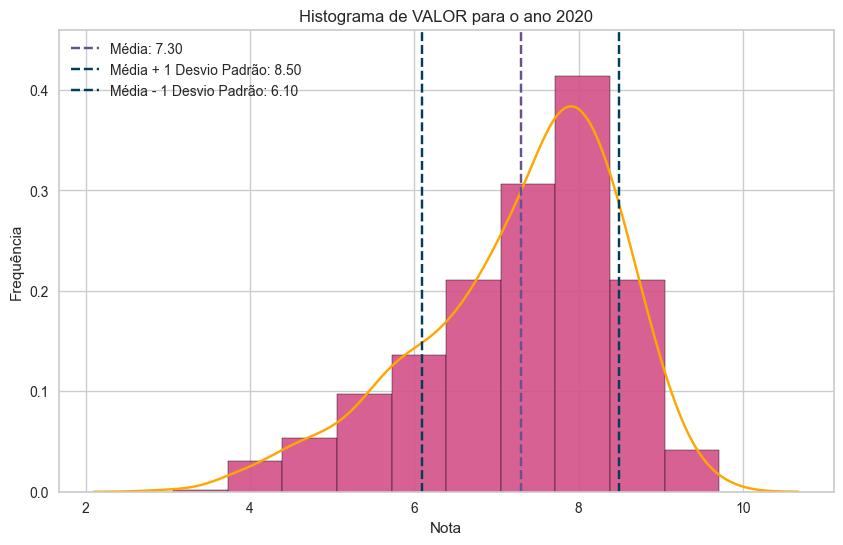

<Figure size 800x550 with 0 Axes>

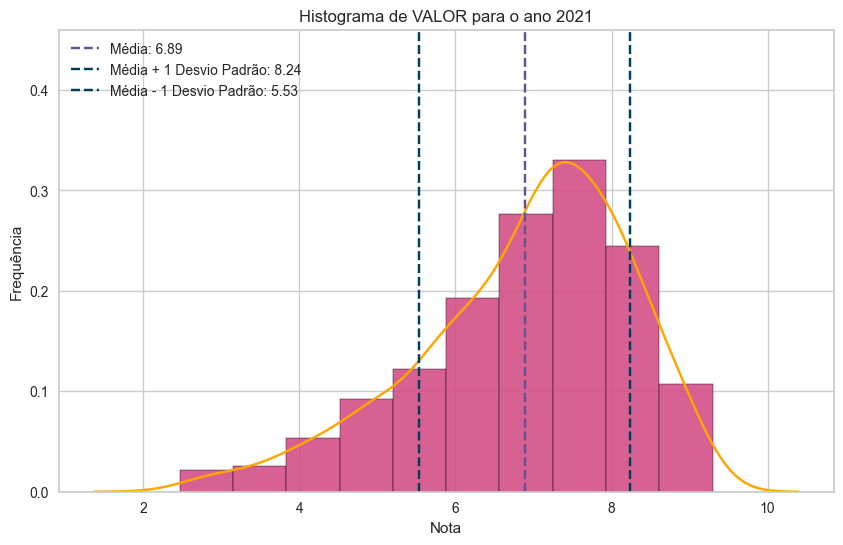

<Figure size 800x550 with 0 Axes>

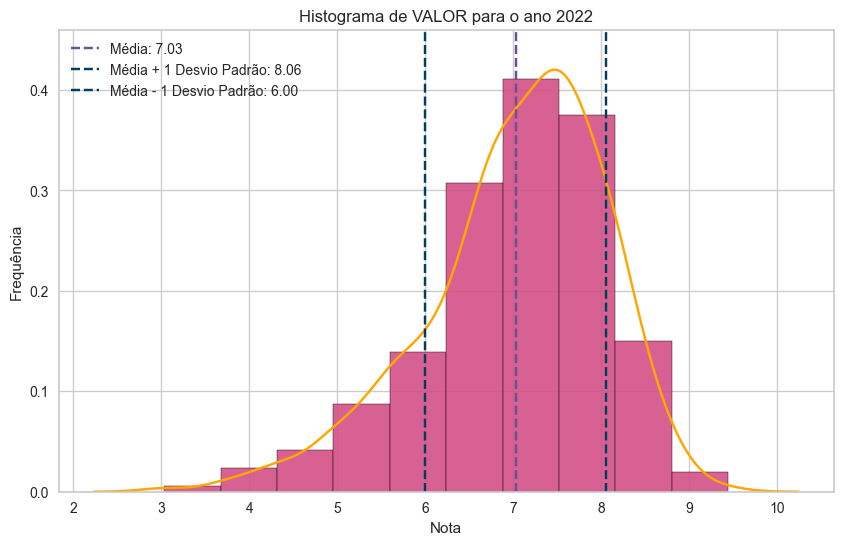

<Figure size 800x550 with 0 Axes>

In [22]:
import seaborn as sns

# sns.set_palette("YlGnBu")

import matplotlib.pyplot as plt

# Filtrar os dados para o ano 2022
data_ano = long_data_inde[long_data_inde['ANO'] == '2022']

# Remover valores NaN
data_ano = data_ano.dropna(subset=['VALOR'])

# Criar o histograma
for ano in anos:
    data_ano = long_data_inde[long_data_inde['ANO'] == ano]
    
    if data_ano.empty:
        print(f"Nenhum dado válido encontrado para o ano {ano}")
        continue
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data_ano['VALOR'], bins=10, color=categorical_palette[4], alpha=0.9, stat='density')
    sns.kdeplot(data_ano['VALOR'], color=categorical_palette[7])
    mean_val = data_ano['VALOR'].mean()
    std_val = data_ano['VALOR'].std()

    plt.axvline(mean_val, color=categorical_palette[2], linestyle='--', label=f'Média: {mean_val:.2f}')
    plt.axvline(mean_val + std_val, color=categorical_palette[0], linestyle='--', label=f'Média + 1 Desvio Padrão: {mean_val + std_val:.2f}')
    plt.axvline(mean_val - std_val, color=categorical_palette[0], linestyle='--', label=f'Média - 1 Desvio Padrão: {mean_val - std_val:.2f}')
    plt.legend()
    plt.title(f'Histograma de VALOR para o ano {ano}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    plt.ylim(0, 0.46)
    
    plt.show()

    plt.savefig(f'../reports/figures/histograma_{ano}.png')


In [23]:
long_data.head()

,NOME,IDADE_ALUNO_2020,VARIAVEL,VALOR,ANO
0,ALUNO-1,11,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
1,ALUNO-2,NaN,INSTITUICAO_ENSINO_ALUNO,NaN,2020
2,ALUNO-3,12,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
3,ALUNO-4,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
4,ALUNO-5,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020


In [24]:
quartzo_analysis = long_data[['NOME', 'ANO', 'VARIAVEL', 'VALOR']]
topazio_analysis = long_data[['NOME', 'ANO', 'VARIAVEL', 'VALOR']]

In [25]:
quartzo_analysis['VARIAVEL'].unique()

array(['INSTITUICAO_ENSINO_ALUNO', 'ANOS_PM', 'FASE_TURMA',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'FASE', 'TURMA', 'SINALIZADOR_INGRESSANTE',
       'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'NIVEL_IDEAL', 'DEFASAGEM', 'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF',
       'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1',
       'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'INDICADO_BOLSA'],
      dtype=object)

In [26]:
columns_to_keep = ['IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'PEDRA']

quartzo_analysis = quartzo_analysis[quartzo_analysis['VARIAVEL'].isin(columns_to_keep)]
topazio_analysis = topazio_analysis[topazio_analysis['VARIAVEL'].isin(columns_to_keep)]

In [27]:
quartzo_analysis = quartzo_analysis.pivot_table(index=['NOME', 'ANO'], columns='VARIAVEL', values='VALOR', aggfunc='first').rename_axis(None, axis=1).reset_index()
topazio_analysis = topazio_analysis.pivot_table(index=['NOME', 'ANO'], columns='VARIAVEL', values='VALOR', aggfunc='first').rename_axis(None, axis=1).reset_index()

In [28]:
quartzo_analysis['QUARTZO'] = quartzo_analysis.apply(lambda row: 1 if row['PEDRA']=='Quartzo' else 0, axis=1)
topazio_analysis['TOPAZIO'] = topazio_analysis.apply(lambda row: 1 if row['PEDRA']=='Topázio' else 0, axis=1)

In [29]:
quartzo_analysis.head()

,NOME,ANO,IAA,IAN,IDA,IEG,IPP,IPS,IPV,PEDRA,QUARTZO
0,ALUNO-1,2020,8.500020000000001,10,7,8.7,5.9375,7.5,7.75,Ametista,0
1,ALUNO-1,2021,7.5,5.0,8.8,6.3,7.7,6.9,8.1,Ametista,0
2,ALUNO-10,2020,5.83333,10,0,5.2,7.96875,3.75,6.8333325,Quartzo,1
3,ALUNO-100,2020,9.000020000000001,5,7.5,6.5,6.875,4.375,7.916665,Ágata,0
4,ALUNO-100,2021,8.5,5.0,0.0,0.0,6.3,3.8,3.8,Quartzo,1


In [30]:
topazio_analysis.head()

,NOME,ANO,IAA,IAN,IDA,IEG,IPP,IPS,IPV,PEDRA,TOPAZIO
0,ALUNO-1,2020,8.500020000000001,10,7,8.7,5.9375,7.5,7.75,Ametista,0
1,ALUNO-1,2021,7.5,5.0,8.8,6.3,7.7,6.9,8.1,Ametista,0
2,ALUNO-10,2020,5.83333,10,0,5.2,7.96875,3.75,6.8333325,Quartzo,0
3,ALUNO-100,2020,9.000020000000001,5,7.5,6.5,6.875,4.375,7.916665,Ágata,0
4,ALUNO-100,2021,8.5,5.0,0.0,0.0,6.3,3.8,3.8,Quartzo,0


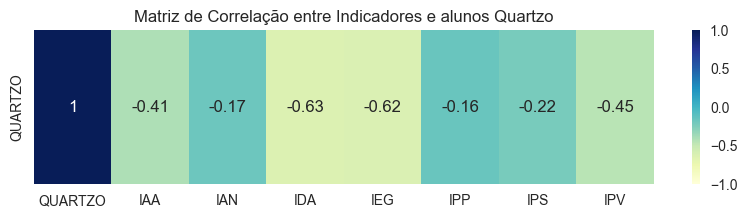

<Figure size 800x550 with 0 Axes>

In [31]:
# Selecionar as colunas de interesse
cols_of_interest = ['QUARTZO', 'IAA', 'IAN', 'IDA', 'IEG', 'IPP', 'IPS', 'IPV']

# Converter as colunas para tipo numérico, se necessário
quartzo_analysis[cols_of_interest] = quartzo_analysis[cols_of_interest].apply(pd.to_numeric, errors='coerce')

# Calcular a matriz de correlação
correlation_matrix = quartzo_analysis[cols_of_interest].corr()

plt.figure(figsize=(10, 2))
sns.heatmap(correlation_matrix.iloc[[0]], annot=True, vmin=-1, vmax=1, cmap=sequential_palette)
plt.title('Matriz de Correlação entre Indicadores e alunos Quartzo')
plt.show()

plt.savefig('../reports/figures/correlation_matrix_quartzo.png')

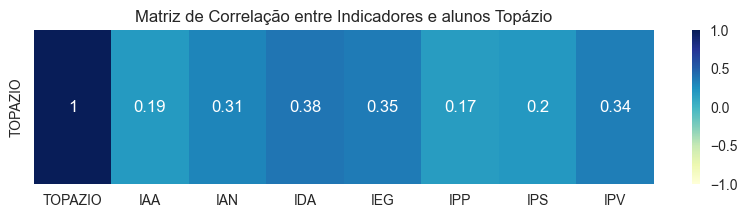

<Figure size 800x550 with 0 Axes>

In [32]:
cols_of_interest = ['TOPAZIO', 'IAA', 'IAN', 'IDA', 'IEG', 'IPP', 'IPS', 'IPV']

topazio_analysis[cols_of_interest] = topazio_analysis[cols_of_interest].apply(pd.to_numeric, errors='coerce')
correlation_matrix = topazio_analysis[cols_of_interest].corr()
plt.figure(figsize=(10, 2))
sns.heatmap(correlation_matrix.iloc[[0]], annot=True, vmin=-1, vmax=1, cmap=sequential_palette)
plt.title('Matriz de Correlação entre Indicadores e alunos Topázio')
plt.show()

plt.savefig('../reports/figures/correlation_matrix_topazio.png')


In [33]:
quartzo_processed = quartzo_analysis.drop(columns=['PEDRA'])
quartzo_processed['ID'] = quartzo_processed['NOME'] + '-' + quartzo_processed['ANO']
quartzo_processed = quartzo_processed.drop(columns=['NOME', 'ANO'])
quartzo_processed = quartzo_processed.set_index('ID')

In [34]:
quartzo_processed.head()

,IAA,IAN,IDA,IEG,IPP,IPS,IPV,QUARTZO
ID,,,,,,,,
ALUNO-1-2020,8.50002,10.0,7.0,8.7,5.93750,7.500,7.750000,0
ALUNO-1-2021,7.50000,5.0,8.8,6.3,7.70000,6.900,8.100000,0
ALUNO-10-2020,5.83333,10.0,0.0,5.2,7.96875,3.750,6.833333,1
ALUNO-100-2020,9.00002,5.0,7.5,6.5,6.87500,4.375,7.916665,0
ALUNO-100-2021,8.50000,5.0,0.0,0.0,6.30000,3.800,3.800000,1


In [35]:
analysis = setup(data=quartzo_processed, target='QUARTZO', session_id=123, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,QUARTZO
2,Target type,Binary
3,Original data shape,"(2276, 8)"
4,Transformed data shape,"(2276, 8)"
5,Transformed train set shape,"(1820, 8)"
6,Transformed test set shape,"(456, 8)"
7,Numeric features,7
8,Rows with missing values,0.0%
9,Preprocess,True


In [36]:
analysis.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9676,0.9933,0.8549,0.9419,0.8956,0.8764,0.8784,0.0260
lr,Logistic Regression,0.9670,0.9928,0.8818,0.9146,0.8971,0.8775,0.8783,0.2940
ada,Ada Boost Classifier,0.9670,0.9882,0.8824,0.9131,0.8971,0.8775,0.8779,0.0170
lightgbm,Light Gradient Boosting Machine,0.9659,0.9917,0.8753,0.9149,0.8934,0.8732,0.8743,0.2350
gbc,Gradient Boosting Classifier,0.9643,0.9917,0.8553,0.9221,0.8863,0.8652,0.8668,0.0360
rf,Random Forest Classifier,0.9626,0.9907,0.8416,0.9249,0.8801,0.8580,0.8602,0.0340
svm,SVM - Linear Kernel,0.9577,0.9921,0.8543,0.8978,0.8651,0.8404,0.8477,0.0060
lda,Linear Discriminant Analysis,0.9560,0.9903,0.8276,0.8990,0.8597,0.8337,0.8361,0.0060
knn,K Neighbors Classifier,0.9533,0.9770,0.8045,0.8990,0.8487,0.8212,0.8232,0.0100
ridge,Ridge Classifier,0.9505,0.9903,0.7233,0.9643,0.8251,0.7971,0.8091,0.0080


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [37]:
model = analysis.create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,0.9854,0.8966,0.8667,0.8814,0.8584,0.8586
1,0.9505,0.9779,0.8621,0.8333,0.8475,0.8180,0.8181
2,0.9615,0.9894,0.8966,0.8667,0.8814,0.8584,0.8586
3,0.9286,0.9700,0.8667,0.7429,0.8000,0.7568,0.7602
4,0.9396,0.9724,0.9667,0.7436,0.8406,0.8041,0.8146
5,0.9725,0.9965,0.9000,0.9310,0.9153,0.8989,0.8991
6,0.9396,0.9796,0.8333,0.8065,0.8197,0.7834,0.7835
7,0.9505,0.9882,0.8000,0.8889,0.8421,0.8129,0.8145
8,0.9451,0.9750,0.9000,0.7941,0.8438,0.8106,0.8129


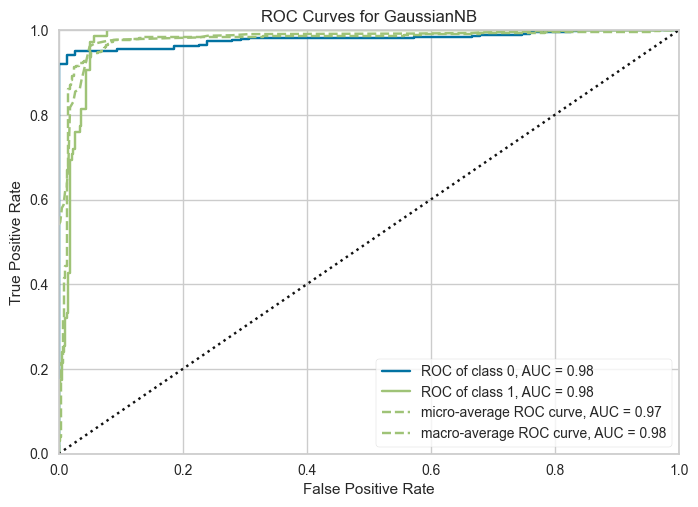

In [38]:
plot_model(model, plot='auc')